In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

CHAPTER_ID = "results"
PROJECT_ROOT_DIR = ".""images"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, CHAPTER_ID)

In [6]:
data=pd.read_csv(r"C:/Users/swana/Desktop/Skyserver.csv")

In [7]:
data.shape

(10000, 18)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [13]:
RESULTS_FOLDER = "results"

data.head()

objid          ra       dec         u         g         r         i  \
0  1.237650e+18  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342   
1  1.237650e+18  183.598371  0.135285  18.66280  17.21449  16.67637  16.48922   
2  1.237650e+18  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732   
3  1.237650e+18  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233   
4  1.237650e+18  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492   

          z  run  rerun  camcol  field     specobjid   class  redshift  plate  \
0  15.22531  752    301       4    267  3.722360e+18    STAR -0.000009   3306   
1  16.39150  752    301       4    267  3.638140e+17    STAR -0.000055    323   
2  16.80125  752    301       4    268  3.232740e+17  GALAXY  0.123111    287   
3  15.90438  752    301       4    269  3.722370e+18    STAR -0.000111   3306   
4  16.61326  752    301       4    269  3.722370e+18    STAR  0.000590   3306   

     mjd  fiberid  
0  54922      491  
1  51615      541  
2  52023      513  
3  54922      510  
4  54922      512

In [15]:
data.describe()

objid            ra           dec             u             g  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000  10000.000000   
mean   1.237650e+18    175.529987     14.836148     18.619355     17.371931   
std    1.577039e+05     47.783439     25.212207      0.828656      0.945457   
min    1.237650e+18      8.235100     -5.382632     12.988970     12.799550   
25%    1.237650e+18    157.370946     -0.539035     18.178035     16.815100   
50%    1.237650e+18    180.394514      0.404166     18.853095     17.495135   
75%    1.237650e+18    201.547279     35.649397     19.259232     18.010145   
max    1.237650e+18    260.884382     68.542265     19.599900     19.918970   

                  r             i             z           run    rerun  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.0   
mean      16.840963     16.583579     16.422833    981.034800    301.0   
std        1.067764      1.141805      1.203188    273.305024      0.0   
min       12.431600     11.947210     11.610410    308.000000    301.0   
25%       16.173333     15.853705     15.618285    752.000000    301.0   
50%       16.858770     16.554985     16.389945    756.000000    301.0   
75%       17.512675     17.258550     17.141447   1331.000000    301.0   
max       24.802040     28.179630     22.833060   1412.000000    301.0   

             camcol         field     specobjid      redshift         plate  \
count  10000.000000  10000.000000  1.000000e+04  10000.000000  10000.000000   
mean       3.648700    302.380100  1.645022e+18      0.143726   1460.986400   
std        1.666183    162.577763  2.013998e+18      0.388774   1788.778371   
min        1.000000     11.000000  2.995780e+17     -0.004136    266.000000   
25%        2.000000    184.000000  3.389248e+17      0.000081    301.000000   
50%        4.000000    299.000000  4.966580e+17      0.042591    441.000000   
75%        5.000000    414.000000  2.881300e+18      0.092579   2559.000000   
max        6.000000    768.000000  9.468830e+18      5.353854   8410.000000   

                mjd       fiberid  
count  10000.000000  10000.000000  
mean   52943.533300    353.069400  
std     1511.150651    206.298149  
min    51578.000000      1.000000  
25%    51900.000000    186.750000  
50%    51997.000000    351.000000  
75%    54468.000000    510.000000  
max    57481.000000   1000.000000

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_std = scaler.fit_transform(
    data.drop("class", axis=1).astype(float))
pd.DataFrame(data_std)\
    .rename({0: 'objid',
             1: 'ra',
             2: 'dec',
             3: 'u',
             4: 'g',
             5: 'r',
             6: 'i', 
             7: 'z', 
             8: 'run',
             9: 'rerun', 
             10: 'camcol',
             11: 'field',
             12: 'spacobjid',
             13: 'redshift', 
             14: 'plate',
             15: 'mjd', 
             16: 'fiberid'}, axis=1, inplace=False)\
    .describe()

objid            ra           dec             u             g  \
count  10000.0  1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04   
mean       0.0 -2.465805e-16 -2.000622e-17  4.292522e-15 -1.235934e-15   
std        0.0  1.000050e+00  1.000050e+00  1.000050e+00  1.000050e+00   
min        0.0 -3.501281e+00 -8.019842e-01 -6.794939e+00 -4.836401e+00   
25%        0.0 -3.800469e-01 -6.098614e-01 -5.326003e-01 -5.889842e-01   
50%        0.0  1.018087e-01 -5.724490e-01  2.820849e-01  1.303176e-01   
75%        0.0  5.445107e-01  8.255640e-01  7.722253e-01  6.750654e-01   
max        0.0  1.786365e+00  2.130270e+00  1.183354e+00  2.694110e+00   

                  r             i             z           run    rerun  \
count  1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04  10000.0   
mean   3.275158e-17 -2.770895e-15  2.951195e-16  3.030451e-14      0.0   
std    1.000050e+00  1.000050e+00  1.000050e+00  1.000050e+00      0.0   
min   -4.129735e+00 -4.060765e+00 -3.999927e+00 -2.462701e+00      0.0   
25%   -6.252917e-01 -6.392605e-01 -6.687137e-01 -8.380609e-01      0.0   
50%    1.667744e-02 -2.504428e-02 -2.733555e-02 -8.234245e-01      0.0   
75%    6.291138e-01  5.911733e-01  5.972884e-01  1.280557e+00      0.0   
max    7.456210e+00  1.015640e+01  5.327968e+00  1.576944e+00      0.0   

             camcol         field     spacobjid      redshift         plate  \
count  1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04   
mean   9.546419e-15 -5.109246e-17 -1.360023e-17  7.344542e-17  2.662315e-17   
std    1.000050e+00  1.000050e+00  1.000050e+00  1.000050e+00  1.000050e+00   
min   -1.589761e+00 -1.792340e+00 -6.680794e-01 -3.803474e-01 -6.680795e-01   
25%   -9.895566e-01 -7.281809e-01 -6.485418e-01 -3.695000e-01 -6.485121e-01   
50%    2.108517e-01 -2.079171e-02 -5.702194e-01 -2.601513e-01 -5.702425e-01   
75%    8.110559e-01  6.865975e-01  6.138735e-01 -1.315668e-01  6.138650e-01   
max    1.411260e+00  2.864126e+00  3.884908e+00  1.340210e+01  3.884976e+00   

                mjd       fiberid  
count  1.000000e+04  1.000000e+04  
mean  -1.936229e-15  4.618528e-17  
std    1.000050e+00  1.000050e+00  
min   -9.036833e-01 -1.706690e+00  
25%   -6.905900e-01 -8.062492e-01  
50%   -6.263973e-01 -1.003161e-02  
75%    1.008862e+00  7.607361e-01  
max    3.002807e+00  3.136058e+00

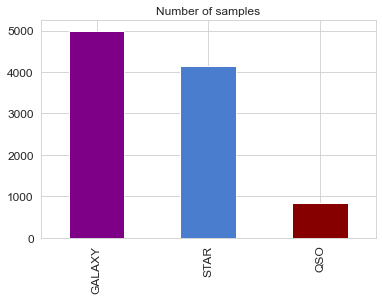

In [18]:
data['class'].value_counts()
star_color='#4a7dce'
galaxy_color='#7e0087'
qso_color='#870000'
array_color=[star_color, galaxy_color, qso_color]
data['class'].value_counts().plot(kind='bar',title='Number of samples', color=['#7e0087','#4a7dce','#870000']);

In [19]:
columns = data.columns
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing')

column_name  percent_missing
objid           objid              0.0
plate           plate              0.0
redshift     redshift              0.0
class           class              0.0
specobjid   specobjid              0.0
field           field              0.0
camcol         camcol              0.0
rerun           rerun              0.0
run               run              0.0
z                   z              0.0
i                   i              0.0
r                   r              0.0
g                   g              0.0
u                   u              0.0
dec               dec              0.0
ra                 ra              0.0
mjd               mjd              0.0
fiberid       fiberid              0.0

In [20]:
print(data.columns.values)
data.drop(['objid', 'run', 'rerun', 'camcol', 'field', 'specobjid', 'plate', 'mjd', 'fiberid'], axis=1, inplace=True)
data.describe()

['objid' 'ra' 'dec' 'u' 'g' 'r' 'i' 'z' 'run' 'rerun' 'camcol' 'field'
 'specobjid' 'class' 'redshift' 'plate' 'mjd' 'fiberid']


ra           dec             u             g             r  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean     175.529987     14.836148     18.619355     17.371931     16.840963   
std       47.783439     25.212207      0.828656      0.945457      1.067764   
min        8.235100     -5.382632     12.988970     12.799550     12.431600   
25%      157.370946     -0.539035     18.178035     16.815100     16.173333   
50%      180.394514      0.404166     18.853095     17.495135     16.858770   
75%      201.547279     35.649397     19.259232     18.010145     17.512675   
max      260.884382     68.542265     19.599900     19.918970     24.802040   

                  i             z      redshift  
count  10000.000000  10000.000000  10000.000000  
mean      16.583579     16.422833      0.143726  
std        1.141805      1.203188      0.388774  
min       11.947210     11.610410     -0.004136  
25%       15.853705     15.618285      0.000081  
50%       16.554985     16.389945      0.042591  
75%       17.258550     17.141447      0.092579  
max       28.179630     22.833060      5.353854

In [21]:
leftover_features = ['ra','dec','u','g','r','i','z','redshift']
data.head()

ra       dec         u         g         r         i         z  \
0  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1  183.598371  0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   

    class  redshift  
0    STAR -0.000009  
1    STAR -0.000055  
2  GALAXY  0.123111  
3    STAR -0.000111  
4    STAR  0.000590

# Data visualzation by histograms, pair plots, scatter plots, etc

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AA001075B0>,
      dtype=object)

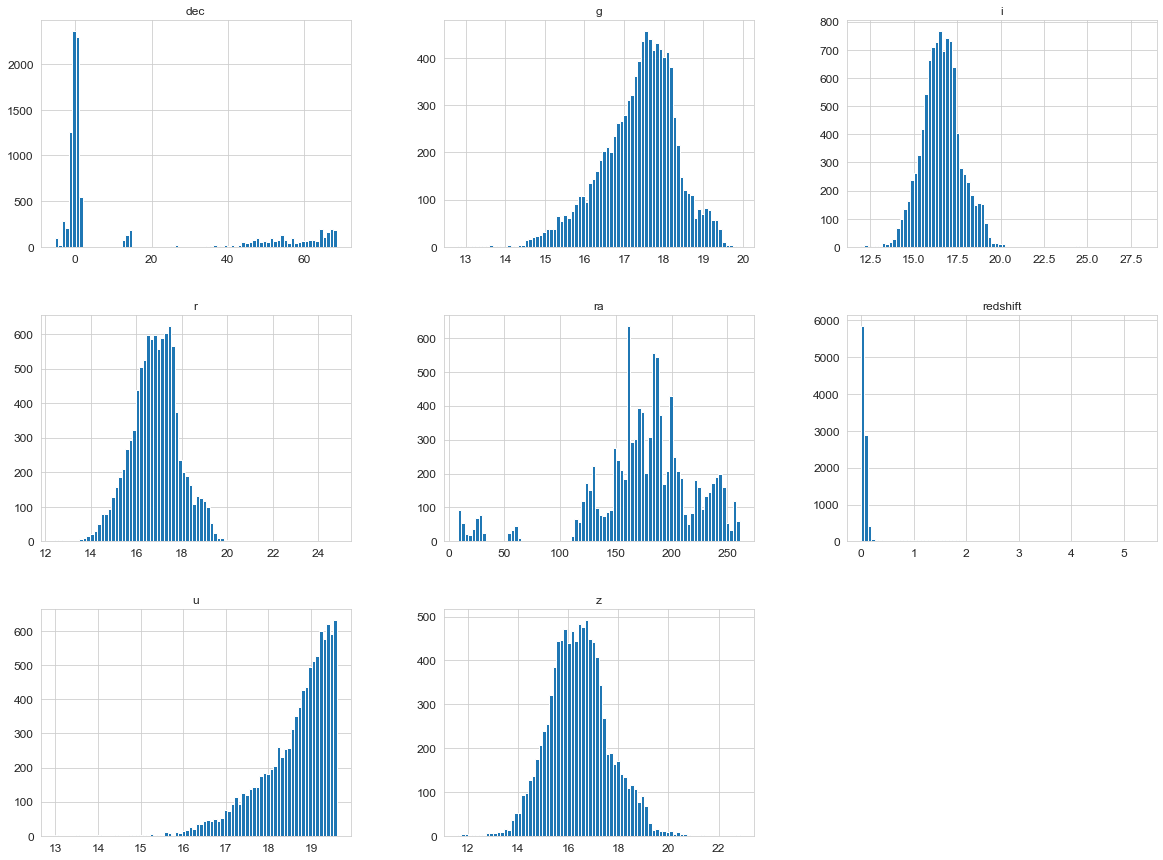

In [22]:
data.hist(bins=80, figsize=(20,15))

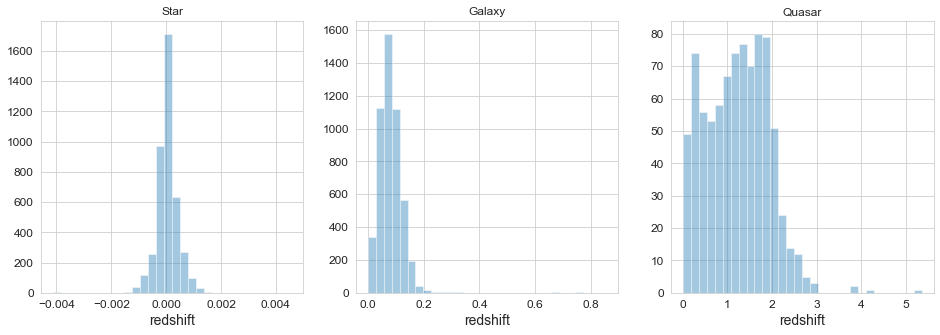

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 5))
ax = sns.distplot(data[data['class']=='STAR'].redshift, bins = 30, ax = axes[0], kde = False)
ax.set_title('Star')
ax = sns.distplot(data[data['class']=='GALAXY'].redshift, bins = 30, ax = axes[1], kde = False)
ax.set_title('Galaxy')
ax = sns.distplot(data[data['class']=='QSO'].redshift, bins = 30, ax = axes[2], kde = False)
ax = ax.set_title('Quasar')

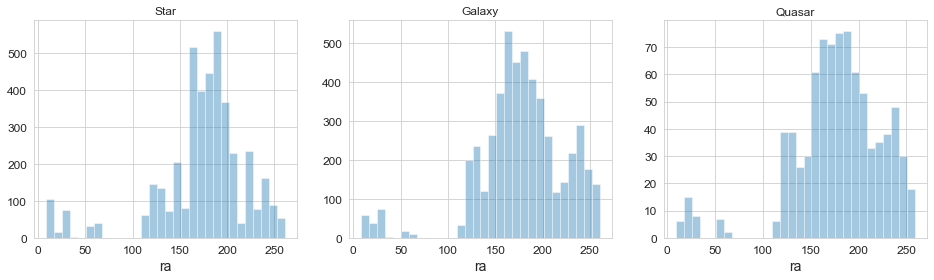

In [24]:
# Right Ascension
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 4))

ax = sns.distplot(data[data['class']=='STAR'].ra, bins = 30, ax = axes[0], kde = False)
ax.set_title('Star')
ax = sns.distplot(data[data['class']=='GALAXY'].ra, bins = 30, ax = axes[1], kde = False)
ax.set_title('Galaxy')
ax = sns.distplot(data[data['class']=='QSO'].ra, bins = 30, ax = axes[2], kde = False)
ax = ax.set_title('Quasar')

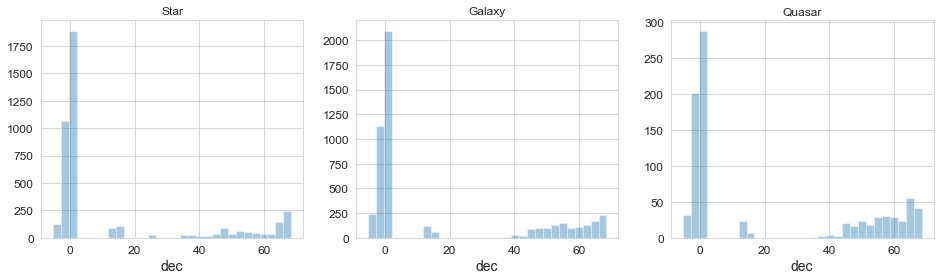

In [25]:
# Declination
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 4))

ax = sns.distplot(data[data['class']=='STAR'].dec, bins = 30, ax = axes[0], kde = False)
ax.set_title('Star')
ax = sns.distplot(data[data['class']=='GALAXY'].dec, bins = 30, ax = axes[1], kde = False)
ax.set_title('Galaxy')
ax = sns.distplot(data[data['class']=='QSO'].dec, bins = 30, ax = axes[2], kde = False)
ax = ax.set_title('Quasar')

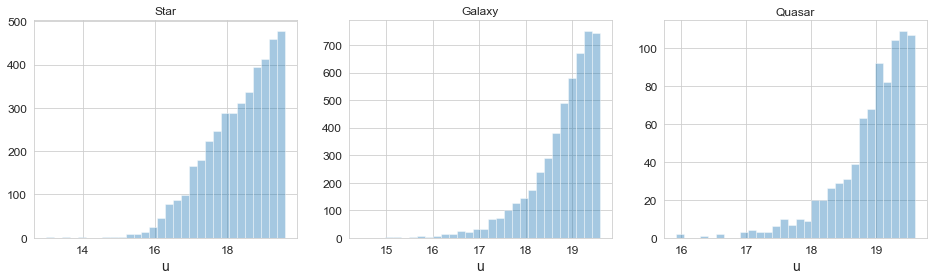

In [26]:
#for U
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 4))

ax = sns.distplot(data[data['class']=='STAR'].u, bins = 30, ax = axes[0], kde = False)
ax.set_title('Star')
ax = sns.distplot(data[data['class']=='GALAXY'].u, bins = 30, ax = axes[1], kde = False)
ax.set_title('Galaxy')
ax = sns.distplot(data[data['class']=='QSO'].u, bins = 30, ax = axes[2], kde = False)
ax = ax.set_title('Quasar')

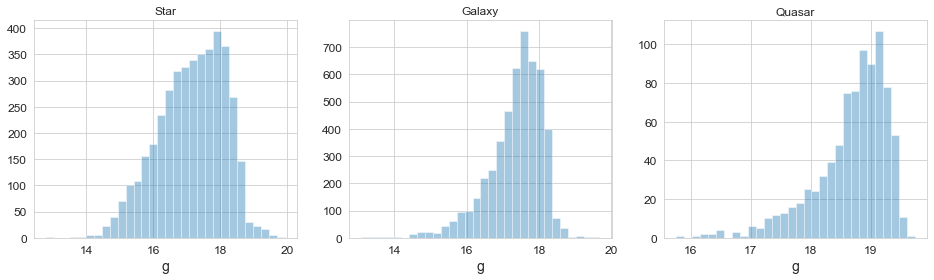

In [27]:
#for G
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 4))

ax = sns.distplot(data[data['class']=='STAR'].g, bins = 30, ax = axes[0], kde = False)
ax.set_title('Star')
ax = sns.distplot(data[data['class']=='GALAXY'].g, bins = 30, ax = axes[1], kde = False)
ax.set_title('Galaxy')
ax = sns.distplot(data[data['class']=='QSO'].g, bins = 30, ax = axes[2], kde = False)
ax = ax.set_title('Quasar')

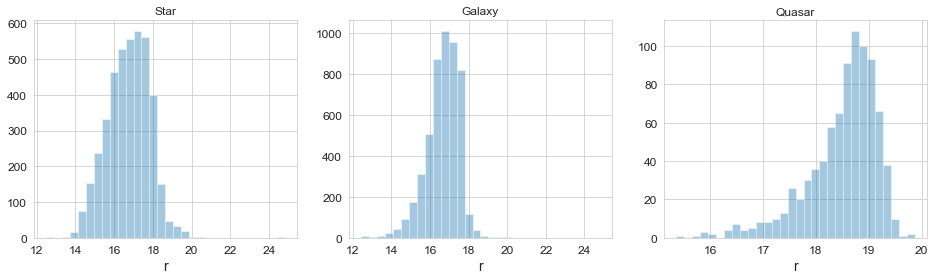

In [28]:
#for R
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 4))

ax = sns.distplot(data[data['class']=='STAR'].r, bins = 30, ax = axes[0], kde = False)
ax.set_title('Star')
ax = sns.distplot(data[data['class']=='GALAXY'].r, bins = 30, ax = axes[1], kde = False)
ax.set_title('Galaxy')
ax = sns.distplot(data[data['class']=='QSO'].r, bins = 30, ax = axes[2], kde = False)
ax = ax.set_title('Quasar')

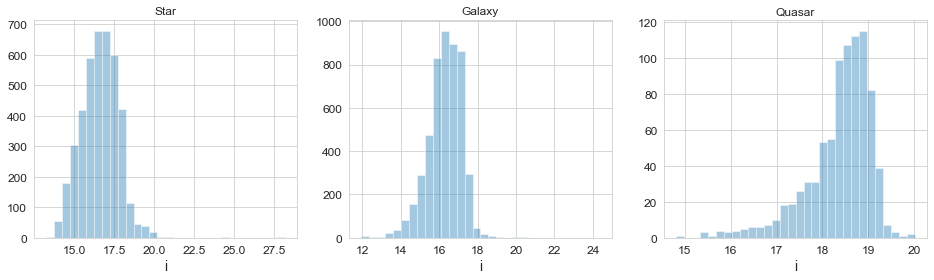

In [29]:
#for I
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 4))

ax = sns.distplot(data[data['class']=='STAR'].i, bins = 30, ax = axes[0], kde = False)
ax.set_title('Star')
ax = sns.distplot(data[data['class']=='GALAXY'].i, bins = 30, ax = axes[1], kde = False)
ax.set_title('Galaxy')
ax = sns.distplot(data[data['class']=='QSO'].i, bins = 30, ax = axes[2], kde = False)
ax = ax.set_title('Quasar')

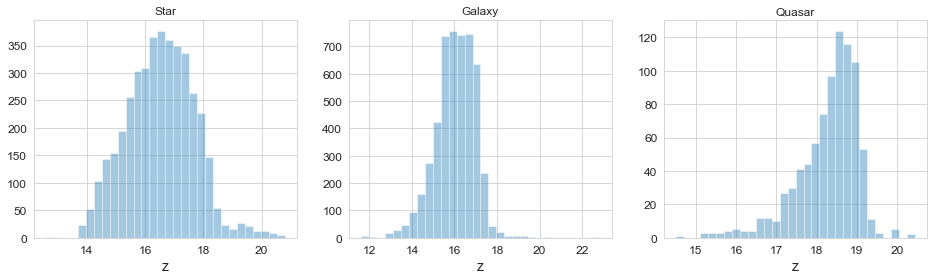

In [30]:
#for Z
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 4))

ax = sns.distplot(data[data['class']=='STAR'].z, bins = 30, ax = axes[0], kde = False)
ax.set_title('Star')
ax = sns.distplot(data[data['class']=='GALAXY'].z, bins = 30, ax = axes[1], kde = False)
ax.set_title('Galaxy')
ax = sns.distplot(data[data['class']=='QSO'].z, bins = 30, ax = axes[2], kde = False)
ax = ax.set_title('Quasar')

In [31]:
axe_indexes = [(0,0),(0,1),(0,2),(0,3),(1,0),(1,1),(1,2),(1,3)]
zipped = list(zip(axe_indexes, leftover_features))
print(zipped)

[((0, 0), 'ra'), ((0, 1), 'dec'), ((0, 2), 'u'), ((0, 3), 'g'), ((1, 0), 'r'), ((1, 1), 'i'), ((1, 2), 'z'), ((1, 3), 'redshift')]


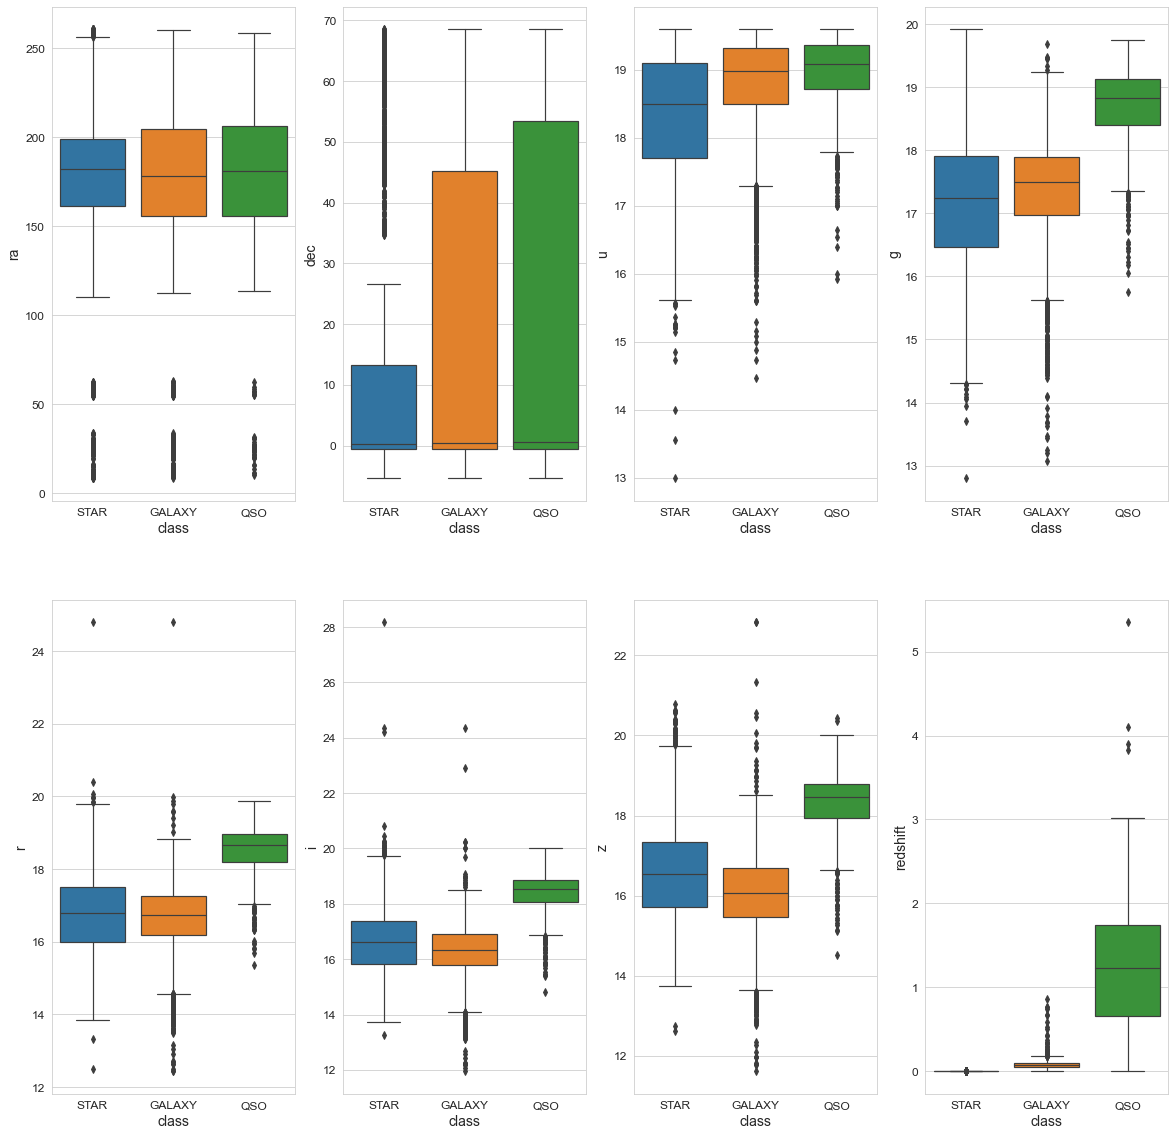

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,20))
for indexes, feature in zipped:
    sns.set_context("paper", rc={"font.size":15,
                                 "axes.titlesize":15,
                                 "axes.labelsize":20,
                                 "xtick.labelsize":20,
                                 "ytick.labelsize":17,
                                 "legend.fontsize":17})      
    sns.boxplot(x="class", y=feature, data=data, ax=axes[indexes[0], indexes[1]])

<Figure size 432x288 with 0 Axes>

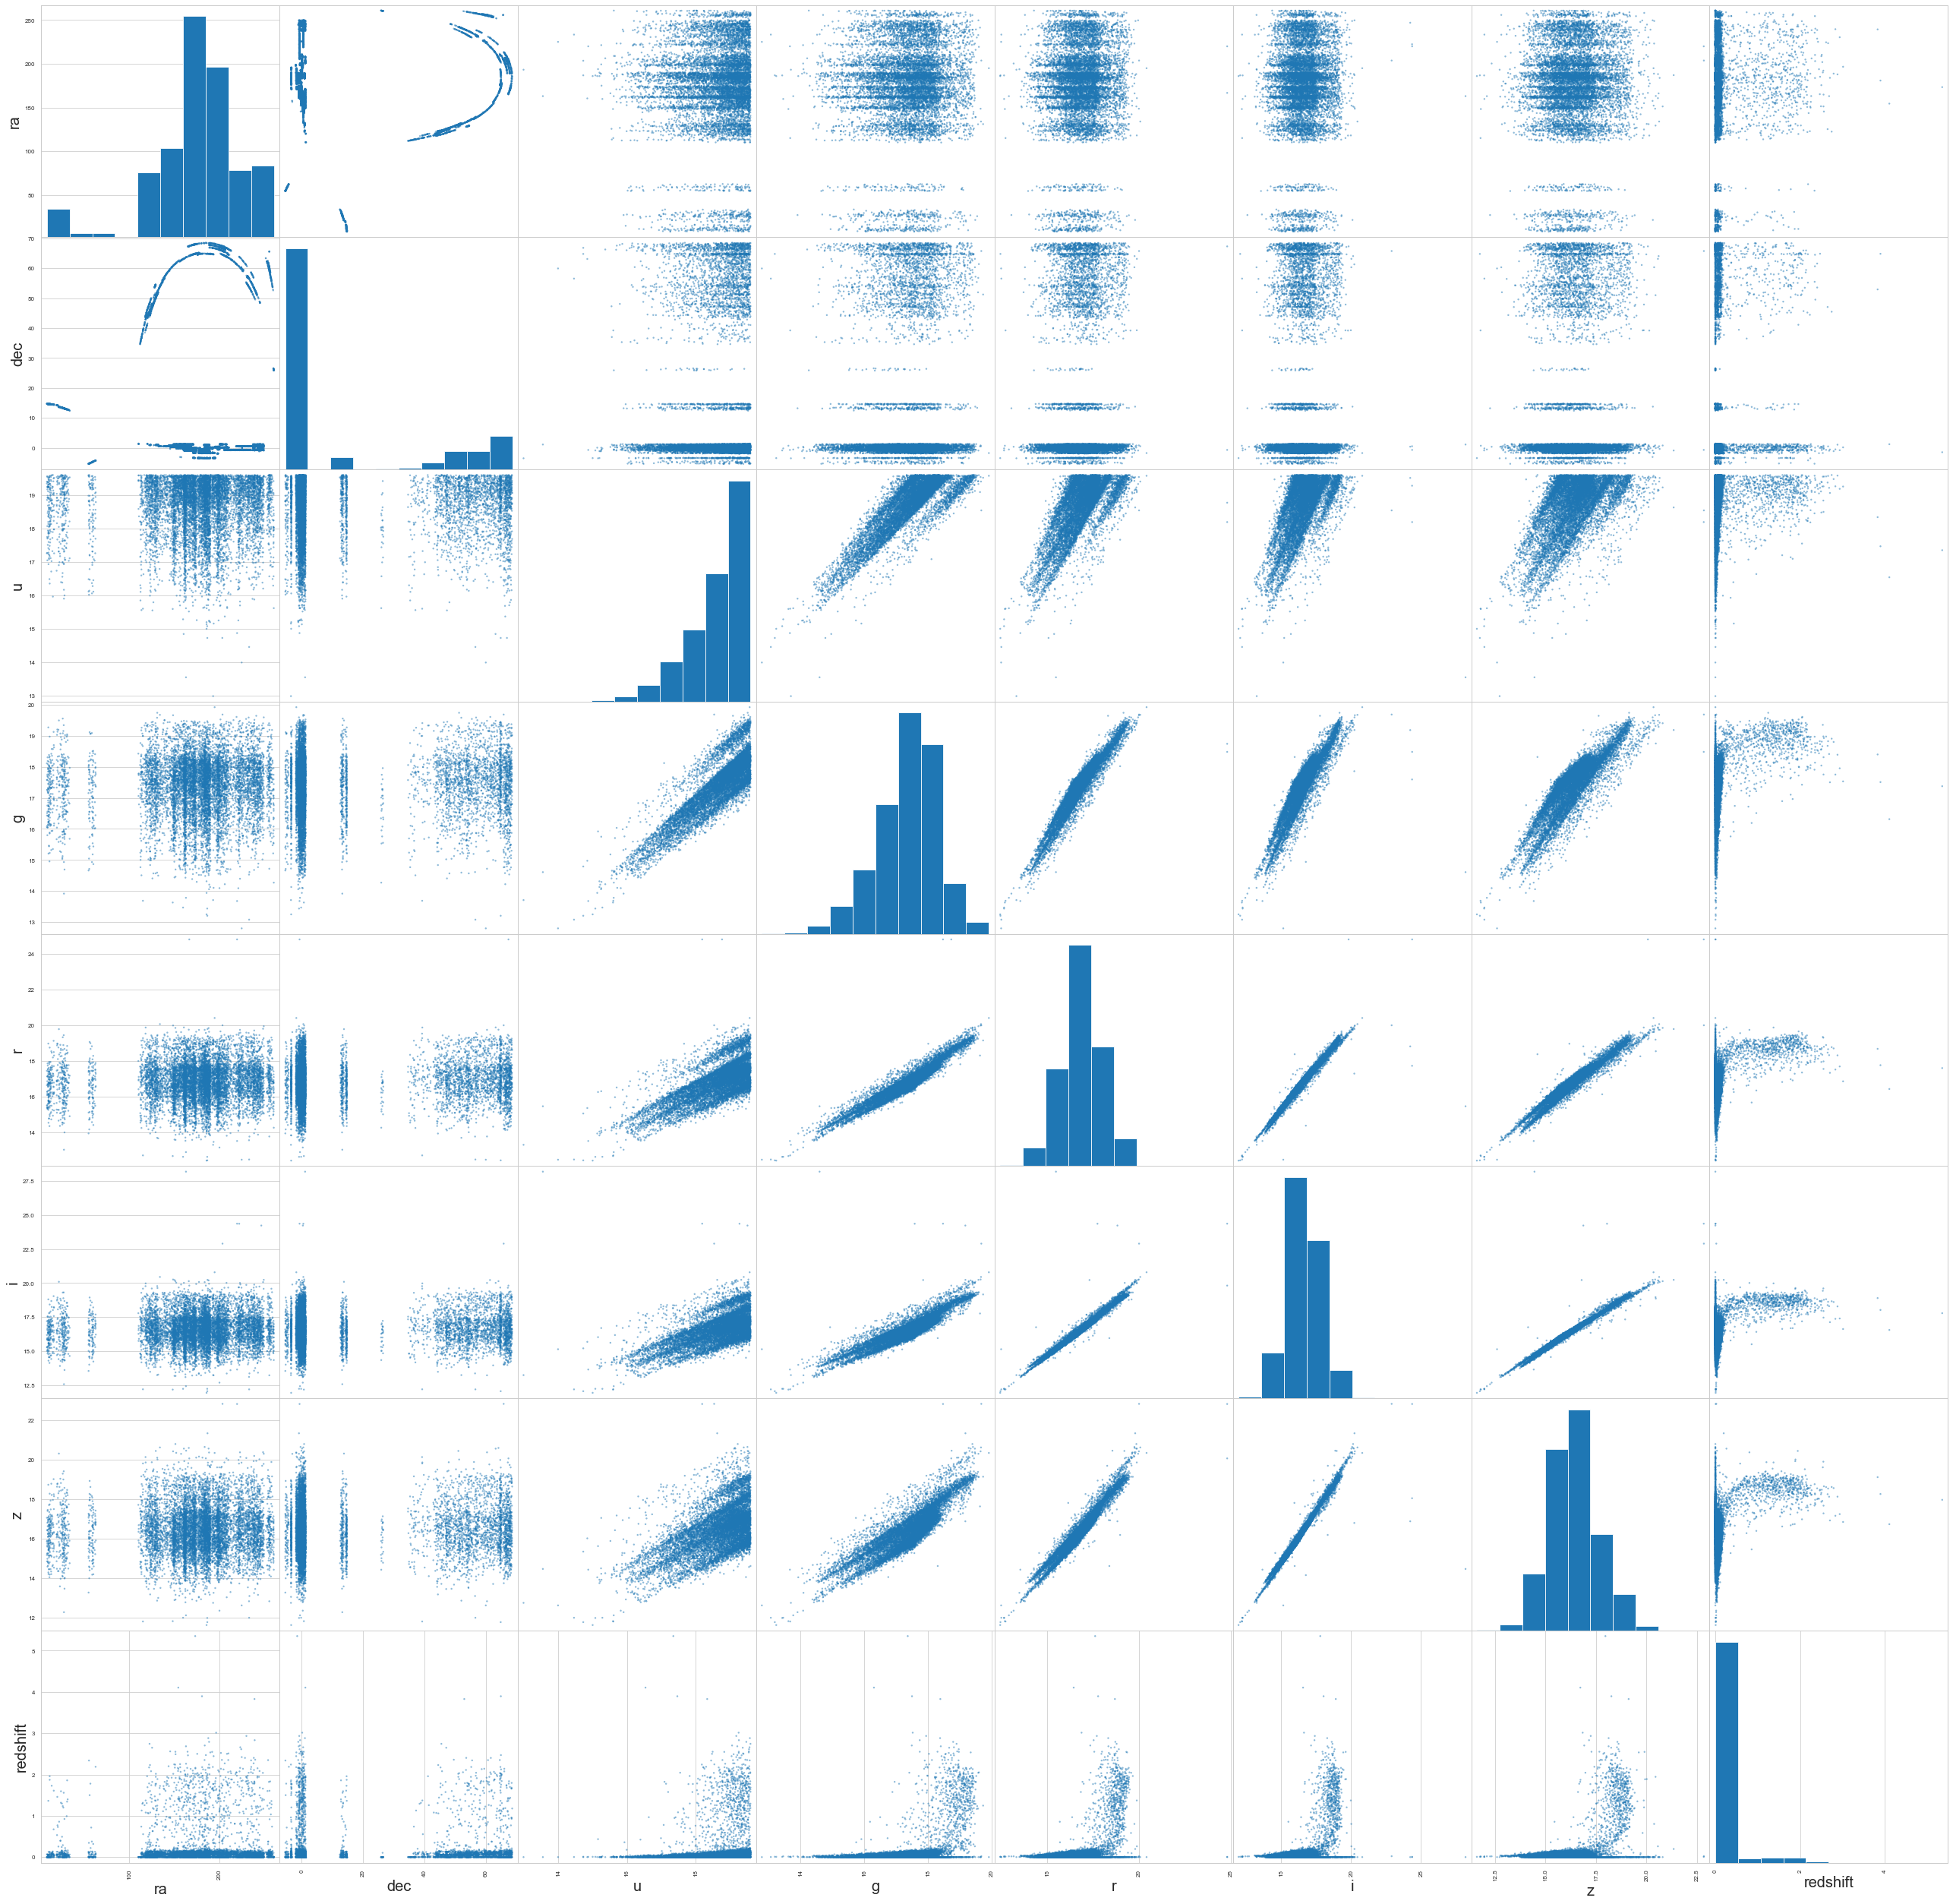

<Figure size 432x288 with 0 Axes>

In [33]:
# scatter plot matrix
pd.plotting.scatter_matrix(data,figsize=(45,45))
plt.figure()

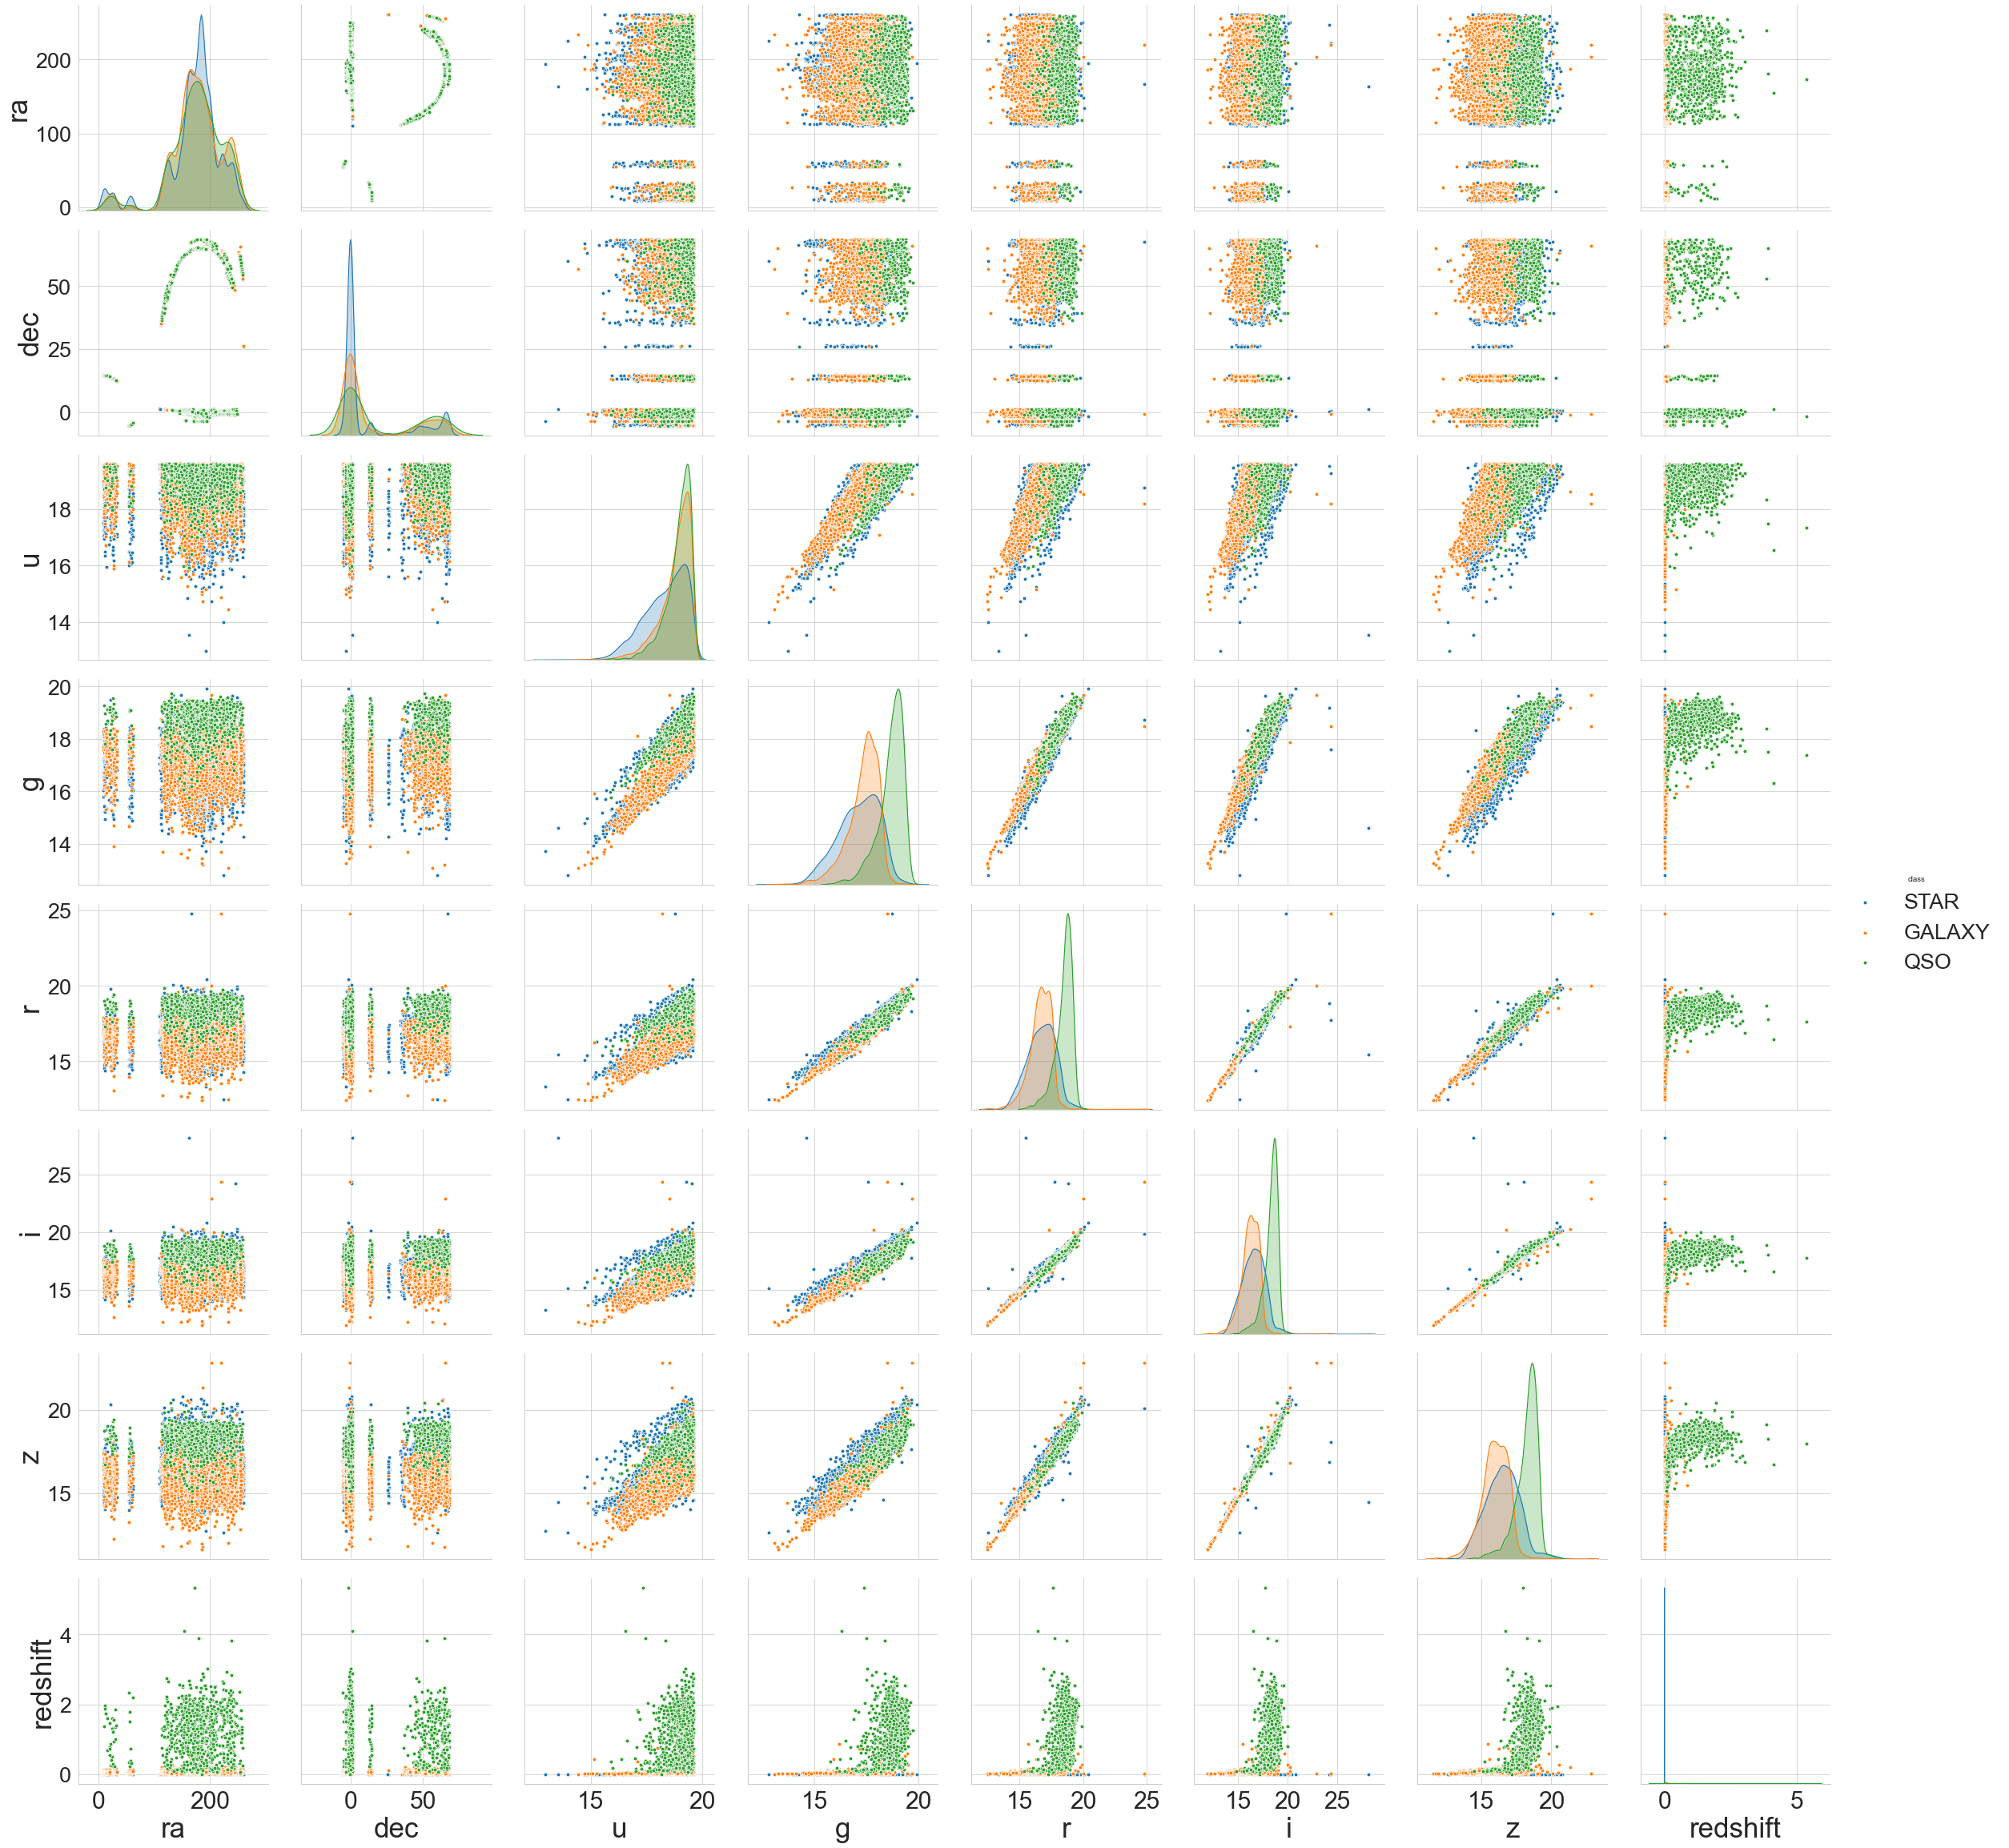

In [34]:
# Using seaborn pairplot to see the bivariate relation between each pair of features
sns.set_context("paper", rc={"font.size":15,
                             "axes.titlesize":15,
                             "axes.labelsize":35,
                             "xtick.labelsize":30,
                             "ytick.labelsize":27,
                             "legend.fontsize":27})      
sns.pairplot(data, hue="class", height=4)

Text(0.5, 1.0, 'Equatorial coordinates')

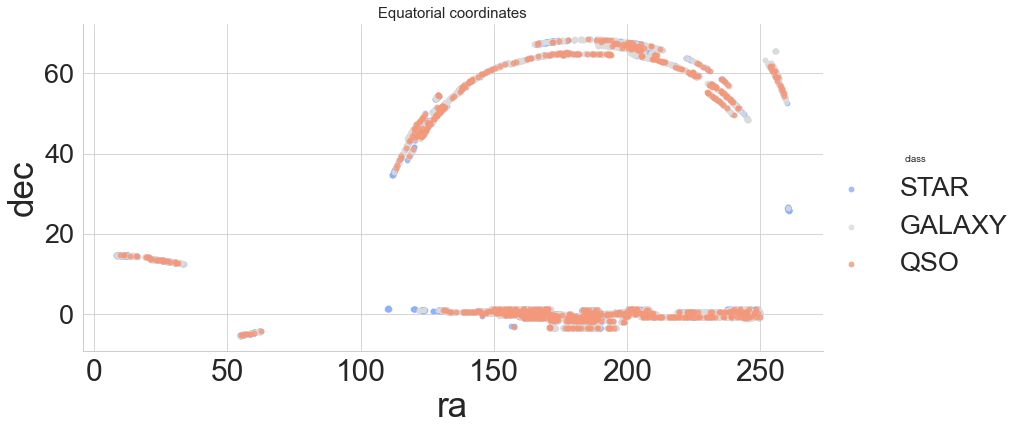

In [35]:
sns.lmplot(x='ra', y='dec', data=data, hue='class', fit_reg=False, palette='coolwarm', height=6, aspect=2)
plt.title('Equatorial coordinates')

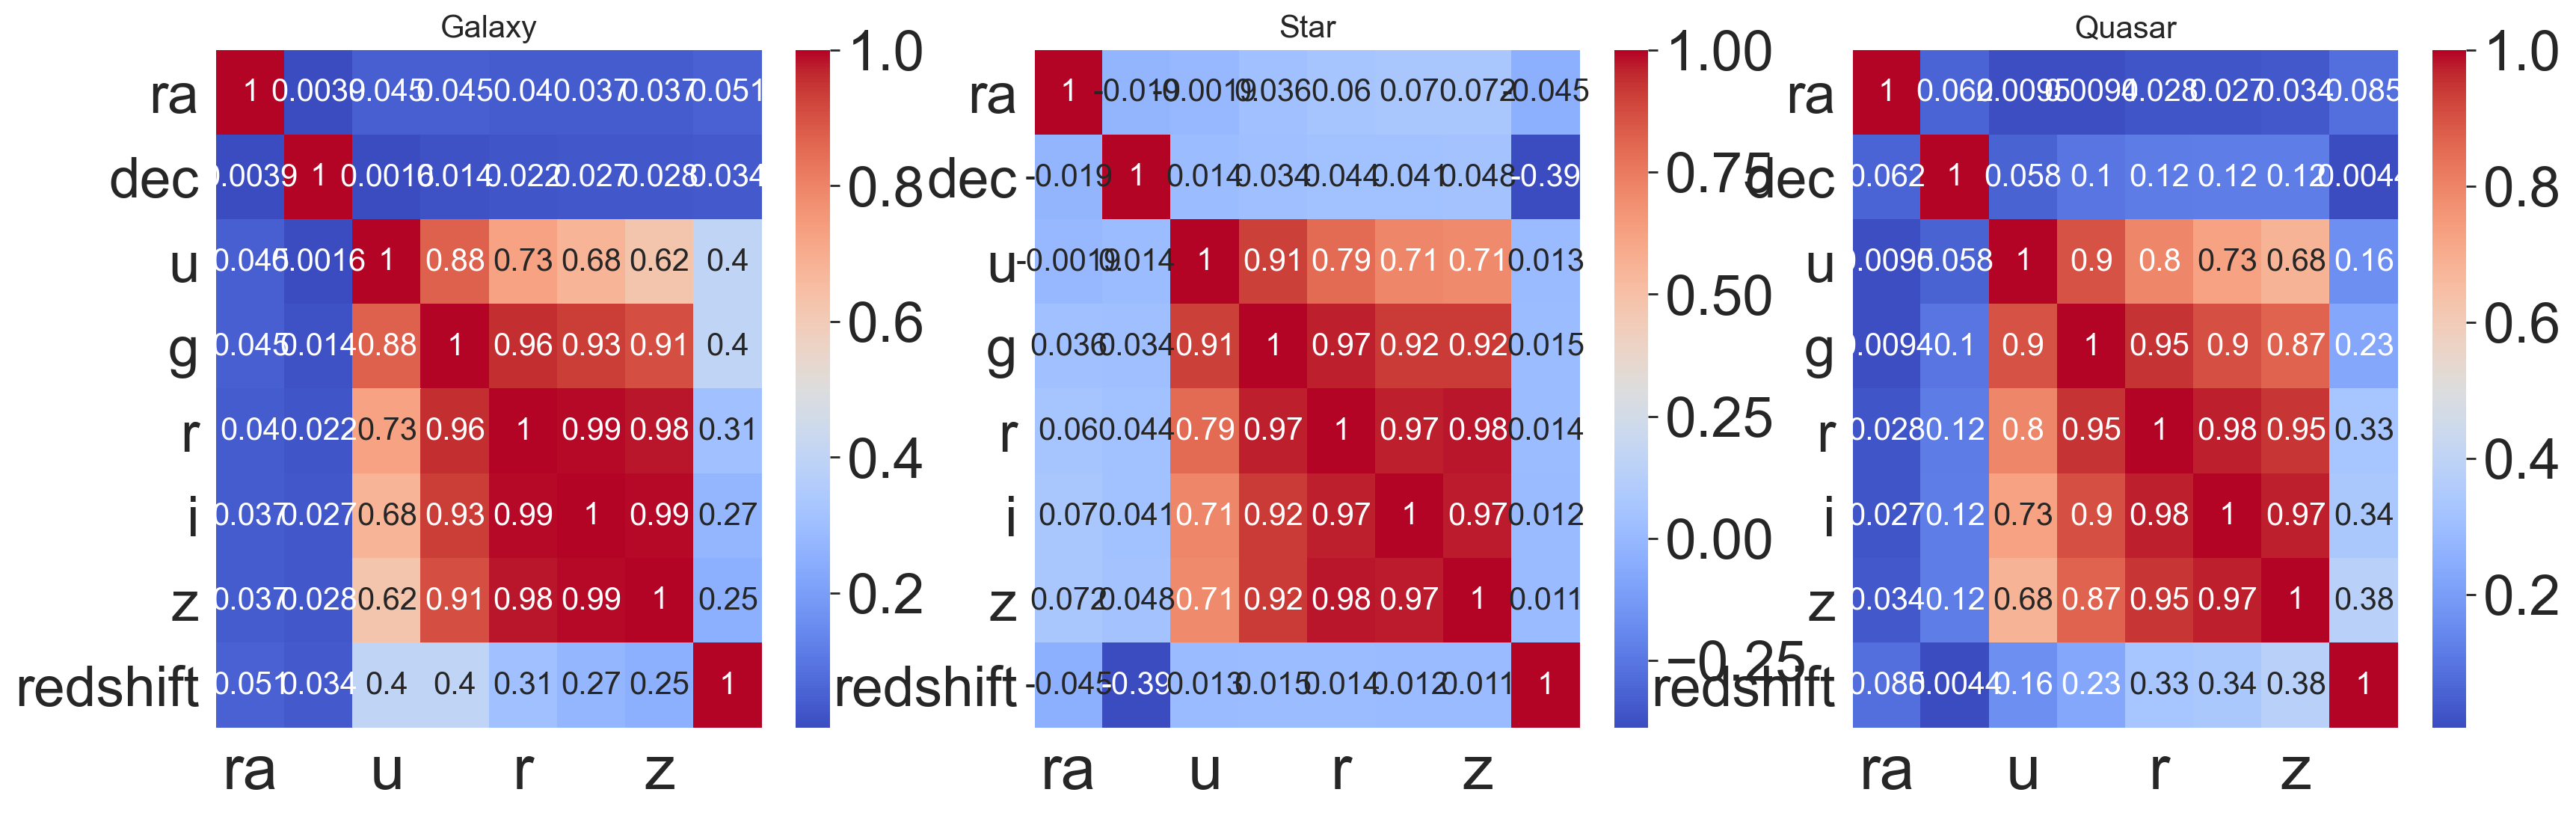

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 6))
fig.set_dpi(200)
ax = sns.heatmap(data[data['class']=='GALAXY'][['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift']].corr(), ax = axes[0], cmap='coolwarm', annot=True)
ax.set_title('Galaxy')
ax = sns.heatmap(data[data['class']=='STAR'][['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift']].corr(), ax = axes[1], cmap='coolwarm', annot=True)
ax.set_title('Star')
ax = sns.heatmap(data[data['class']=='QSO'][['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift']].corr(), ax = axes[2], cmap='coolwarm', annot=True)
ax = ax.set_title('Quasar')

# PCA

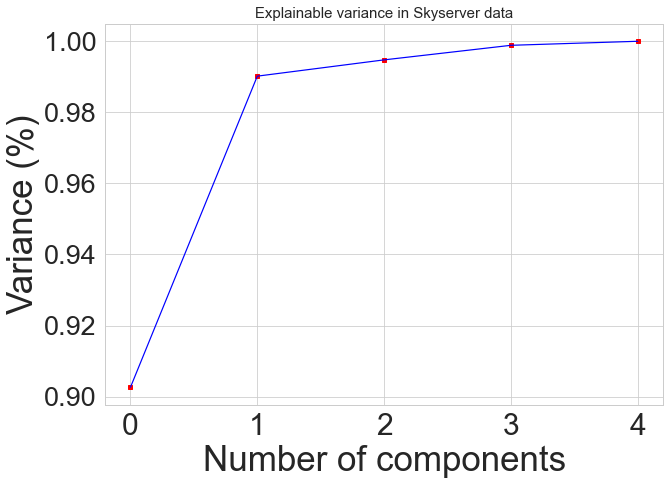

In [38]:
from sklearn.decomposition import PCA
from matplotlib.ticker import MaxNLocator

#Fitting the PCA algorithm with our Data
pca = PCA().fit(data[['u', 'g', 'r', 'i', 'z']])
#Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'rs',np.cumsum(pca.explained_variance_ratio_), '-b')
plt.xlabel('Number of components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explainable variance in Skyserver data')
plt.show()

In [39]:
data.columns

Index(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'class', 'redshift'], dtype='object')

In [40]:
def ToTheEnd(df,column):
    Target_data=df[column]
    df=df.drop([column],axis=1)
    df[column]=Target_data
    return df

data=ToTheEnd(data,'class')


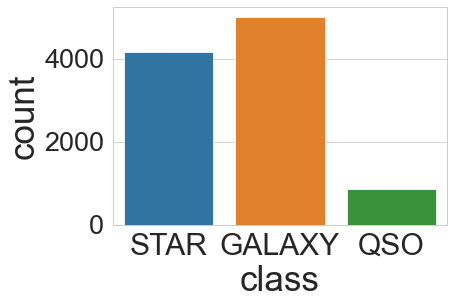

In [41]:
data['class'].head(10)
ax = sns.countplot(x='class',data=data)

In [42]:
data['class']=data['class'].map({'STAR':0,'GALAXY':1,'QSO':2}).astype(int)

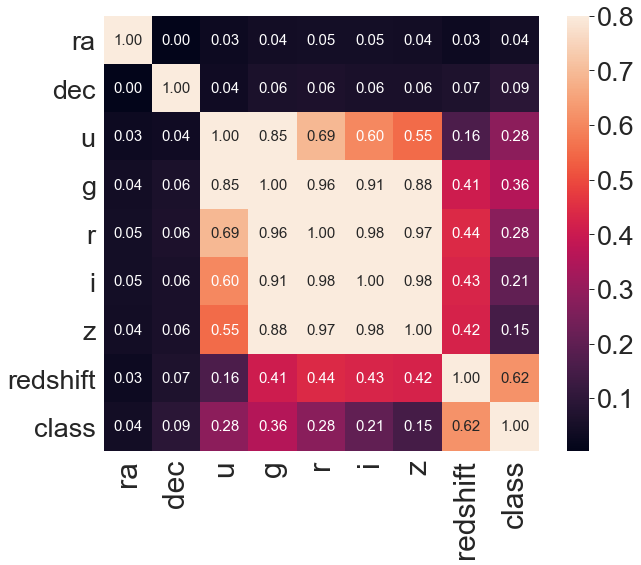

In [44]:
ax = plt.subplots(figsize=(10,8))
sns.heatmap(data.corr(), vmax=.8 ,annot=True,square=True,fmt=".2f")

In [48]:
data.describe()

ra           dec             u             g             r  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean     175.529987     14.836148     18.619355     17.371931     16.840963   
std       47.783439     25.212207      0.828656      0.945457      1.067764   
min        8.235100     -5.382632     12.988970     12.799550     12.431600   
25%      157.370946     -0.539035     18.178035     16.815100     16.173333   
50%      180.394514      0.404166     18.853095     17.495135     16.858770   
75%      201.547279     35.649397     19.259232     18.010145     17.512675   
max      260.884382     68.542265     19.599900     19.918970     24.802040   

                  i             z      redshift         class  
count  10000.000000  10000.000000  10000.000000  10000.000000  
mean      16.583579     16.422833      0.143726      0.669800  
std        1.141805      1.203188      0.388774      0.625465  
min       11.947210     11.610410     -0.004136      0.000000  
25%       15.853705     15.618285      0.000081      0.000000  
50%       16.554985     16.389945      0.042591      1.000000  
75%       17.258550     17.141447      0.092579      1.000000  
max       28.179630     22.833060      5.353854      2.000000

C:\Users\swana\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\swana\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\swana\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

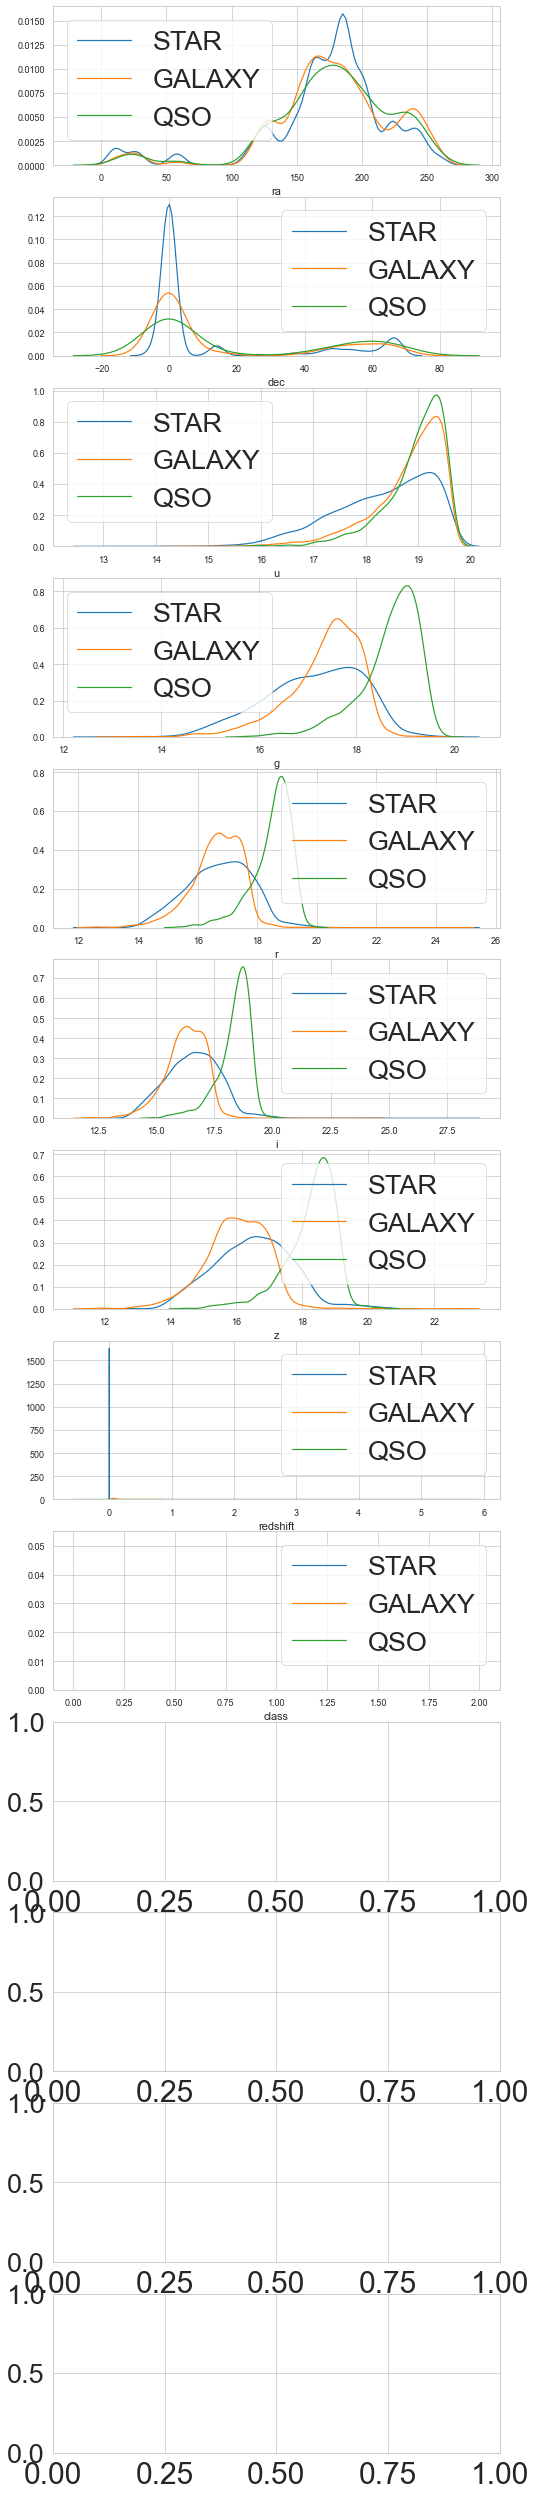

In [50]:
def feature_dist(df0,df1,df2,label0,label1,label2,features):
    plt.figure()
    fig,ax=plt.subplots(13,1,figsize=(8,45))
    i=0
    for ft in features:
        i+=1
        plt.subplot(13,1,i)
        # plt.figure()
        sns.distplot(df0[ft], hist=False,label=label0)
        sns.distplot(df1[ft], hist=False,label=label1)
        sns.distplot(df2[ft], hist=False,label=label2)
        plt.xlabel(ft, fontsize=11)
        #locs, labels = plt.xticks()
        plt.tick_params(axis='x', labelsize=9)
        plt.tick_params(axis='y', labelsize=9)
    plt.show()
t0 = data.loc[data['class'] == 0]
t1 = data.loc[data['class'] == 1]
t2 = data.loc[data['class'] == 2]
features = data.columns.values[:13]
feature_dist(t0,t1,t2, 'STAR', 'GALAXY','QSO', features)

In [51]:
#data['redshift'].describe()
data[['redshift','class']].groupby(['class'],as_index=False).mean().sort_values(by='class',ascending=False)

class  redshift
2      2  1.218366
1      1  0.080325
0      0  0.000043

Preparing the data 

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [53]:
X=data.drop(['class'],axis=1)
y=data['class']

In [54]:
X=StandardScaler().fit_transform(X)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=44, shuffle =True)
X_train

array([[-0.93572463,  1.471357  , -1.54334162, ..., -1.87438888,
        -1.93181721, -0.22622668],
       [-0.15402103, -0.54648393,  1.16035207, ...,  1.414998  ,
         1.42174149, -0.36756491],
       [-0.05468482, -0.62355222,  0.95827984, ...,  0.67382727,
         0.69875933, -0.36984595],
       ...,
       [ 1.44339239, -0.60824952, -0.76218229, ..., -1.12043074,
        -1.19461379, -0.23986549],
       [-0.04586363,  1.98709129,  0.28679756, ..., -0.76379329,
        -0.86769925, -0.20785831],
       [-0.02855027, -0.64485605, -0.92987184, ..., -0.13932084,
        -0.01418233, -0.37003036]])

Let's Predict

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [57]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [58]:
y_pred = random_forest.predict(X_test)

Test_acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 3)
print("Score ",Test_acc_random_forest)

Score  99.1


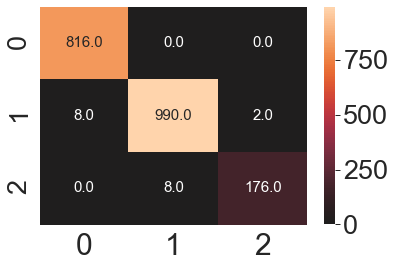

In [59]:
sns.heatmap(confusion_matrix(y_test , y_pred), center=True,annot=True,fmt='.1f')